# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#dependencies
import requests
import json
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from numpy import random
from config import api_key
from pprint import pprint
from scipy.stats import linregress
from sklearn import datasets
 #Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/output_weather_data_file.csv"

In [2]:
# quick look at data output struture using name = "San Jose" as an example
#url = "http://api.openweathermap.org/data/2.5/weather?"
#test_city = "San Jose"
#units = "imperial"
# Build query URL
#test_query_url = url + units + "&appid=" + api_key +"&q="+ test_city
#test_query_url

In [3]:
#Test url and Get weather data for "San Jose"
#test_response = requests.get(test_query_url).json()
#test_response

# get country name
#countryy = test_response['sys']['country']
#countryy
#idd= test_response['sys']['id']
#idd
#temp= test_response['main']['temp']
#temp

## Generate Cities List

In [4]:
city_from_citypy = []

max_city = 1500
for i in range(max_city):
    long=random.uniform(180,-180)
    lat =random.uniform(90,-90)
    city=citipy.nearest_city(lat,long)
    city_name=city.city_name
    if city_name not in city_from_citypy:
        city_from_citypy.append(city_name)
print (len(city_from_citypy))


626


In [5]:
type(city_from_citypy)

list

In [6]:
# convert list to dataframe
citypy_df = DataFrame(city_from_citypy,columns=['CityPy'])

citypy_df['CityPy'] = citypy_df['CityPy'].str.title()
citypy_df

,CityPy
0,Faanui
1,Rikitea
2,Vakhrushev
3,Port Elizabeth
4,Malang
...,...
621,Champerico
622,Honningsvag
623,Hare Bay
624,Nome


In [7]:
type(citypy_df)

pandas.core.frame.DataFrame

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
city = citypy_df['CityPy']
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [9]:
city

0              Faanui
1             Rikitea
2          Vakhrushev
3      Port Elizabeth
4              Malang
            ...      
621        Champerico
622       Honningsvag
623          Hare Bay
624              Nome
625         Panjakent
Name: CityPy, Length: 626, dtype: object

In [10]:
random_search_data = []
city_list = []
country_list = []


searchCnt = 0
print("Begin API Call to OpenWeather Database ")
print("---------------------------------------")

#Loop thry each city
for city in citypy_df["CityPy"]:
    try:
        # Create search query, make request and store in json
        print(f"Processing record {searchCnt} for the city: {city}")
        searchCnt += 1
        
        weather_response = requests.get(query_url + city).json()     
        
        # Try to grab the country and id of cities if they are available in openweather API
        country_data      = weather_response['sys']['country']
        city_id          = weather_response['id']
        temp = weather_response['main']['temp']
        
        random_search_data.append(weather_response)
        city_list.append(city)
        country_list.append(country_data)
        print(f"Record found for city id: {city_id} with city name : {city}")
       
   
    # Handle exceptions for a city that is not available in the openweather API
    except:
        #append null value
        print(f"No weather record found for city: {city}")
        pass


    
print("---------------------------------------")
print("Processing Complete")

Begin API Call to OpenWeather Database 
---------------------------------------
Processing record 0 for the city: Faanui
Record found for city id: 4034551 with city name : Faanui
Processing record 1 for the city: Rikitea
Record found for city id: 4030556 with city name : Rikitea
Processing record 2 for the city: Vakhrushev
Record found for city id: 2119964 with city name : Vakhrushev
Processing record 3 for the city: Port Elizabeth
Record found for city id: 964420 with city name : Port Elizabeth
Processing record 4 for the city: Malang
Record found for city id: 1636722 with city name : Malang
Processing record 5 for the city: Makat
Record found for city id: 608872 with city name : Makat
Processing record 6 for the city: Kyren
Record found for city id: 2021031 with city name : Kyren
Processing record 7 for the city: Faya
Record found for city id: 110690 with city name : Faya
Processing record 8 for the city: Taolanaro
No weather record found for city: Taolanaro
Processing record 9 for t

Record found for city id: 5955902 with city name : Fort Nelson
Processing record 81 for the city: Salalah
Record found for city id: 286621 with city name : Salalah
Processing record 82 for the city: Arraial Do Cabo
Record found for city id: 3471451 with city name : Arraial Do Cabo
Processing record 83 for the city: Upernavik
Record found for city id: 3418910 with city name : Upernavik
Processing record 84 for the city: Samusu
No weather record found for city: Samusu
Processing record 85 for the city: Erenhot
Record found for city id: 2037485 with city name : Erenhot
Processing record 86 for the city: Carnarvon
Record found for city id: 2074865 with city name : Carnarvon
Processing record 87 for the city: Bambous Virieux
Record found for city id: 1106677 with city name : Bambous Virieux
Processing record 88 for the city: Laguna
Record found for city id: 5364271 with city name : Laguna
Processing record 89 for the city: Katsuura
Record found for city id: 2112309 with city name : Katsuura

No weather record found for city: Kuche
Processing record 161 for the city: Arzgir
Record found for city id: 580716 with city name : Arzgir
Processing record 162 for the city: Bajo Baudo
No weather record found for city: Bajo Baudo
Processing record 163 for the city: Nabire
Record found for city id: 1634614 with city name : Nabire
Processing record 164 for the city: Dondo
Record found for city id: 1024696 with city name : Dondo
Processing record 165 for the city: Ahipara
Record found for city id: 2194098 with city name : Ahipara
Processing record 166 for the city: Korla
Record found for city id: 1529376 with city name : Korla
Processing record 167 for the city: Sucre
Record found for city id: 3903987 with city name : Sucre
Processing record 168 for the city: Port Hardy
Record found for city id: 6111862 with city name : Port Hardy
Processing record 169 for the city: Crab Hill
No weather record found for city: Crab Hill
Processing record 170 for the city: Tilichiki
Record found for city 

Record found for city id: 2128975 with city name : Nemuro
Processing record 241 for the city: Diez
Record found for city id: 2937018 with city name : Diez
Processing record 242 for the city: Madang
Record found for city id: 2091996 with city name : Madang
Processing record 243 for the city: Pevek
Record found for city id: 2122090 with city name : Pevek
Processing record 244 for the city: Mandalgovi
Record found for city id: 2030065 with city name : Mandalgovi
Processing record 245 for the city: Margate
Record found for city id: 2643044 with city name : Margate
Processing record 246 for the city: Barranca
Record found for city id: 3946820 with city name : Barranca
Processing record 247 for the city: San Luis
Record found for city id: 3837056 with city name : San Luis
Processing record 248 for the city: Culebra
Record found for city id: 4564070 with city name : Culebra
Processing record 249 for the city: Samarai
Record found for city id: 2132606 with city name : Samarai
Processing record

Record found for city id: 3456127 with city name : Nova Petropolis
Processing record 321 for the city: Langres
Record found for city id: 3007679 with city name : Langres
Processing record 322 for the city: Yar-Sale
Record found for city id: 1486321 with city name : Yar-Sale
Processing record 323 for the city: Santa Cruz
Record found for city id: 3904906 with city name : Santa Cruz
Processing record 324 for the city: Ponta Do Sol
Record found for city id: 2264557 with city name : Ponta Do Sol
Processing record 325 for the city: Porto Velho
Record found for city id: 3662762 with city name : Porto Velho
Processing record 326 for the city: Olinda
Record found for city id: 3393536 with city name : Olinda
Processing record 327 for the city: Karpogory
Record found for city id: 552256 with city name : Karpogory
Processing record 328 for the city: Liapades
No weather record found for city: Liapades
Processing record 329 for the city: Nuevo Progreso
Record found for city id: 3522526 with city na

Record found for city id: 1173889 with city name : Khipro
Processing record 400 for the city: Port Macquarie
Record found for city id: 2152659 with city name : Port Macquarie
Processing record 401 for the city: Akureyri
Record found for city id: 2633274 with city name : Akureyri
Processing record 402 for the city: Fulitun
No weather record found for city: Fulitun
Processing record 403 for the city: Saint-Francois
Record found for city id: 2980080 with city name : Saint-Francois
Processing record 404 for the city: Itarema
Record found for city id: 3393692 with city name : Itarema
Processing record 405 for the city: Pacific Grove
Record found for city id: 5380437 with city name : Pacific Grove
Processing record 406 for the city: Dubrovnik
Record found for city id: 3201047 with city name : Dubrovnik
Processing record 407 for the city: Lagoa
Record found for city id: 3372964 with city name : Lagoa
Processing record 408 for the city: Sao Felix Do Xingu
Record found for city id: 3388847 with

Record found for city id: 540761 with city name : Kropotkin
Processing record 480 for the city: Kalimnos
No weather record found for city: Kalimnos
Processing record 481 for the city: Zhigansk
Record found for city id: 2012530 with city name : Zhigansk
Processing record 482 for the city: Caramay
Record found for city id: 1718517 with city name : Caramay
Processing record 483 for the city: Beira
Record found for city id: 1052373 with city name : Beira
Processing record 484 for the city: Monrovia
Record found for city id: 2274895 with city name : Monrovia
Processing record 485 for the city: Ondjiva
Record found for city id: 3346821 with city name : Ondjiva
Processing record 486 for the city: Ati
Record found for city id: 2436400 with city name : Ati
Processing record 487 for the city: Vila Franca Do Campo
Record found for city id: 3372472 with city name : Vila Franca Do Campo
Processing record 488 for the city: Zyryanka
Record found for city id: 2119283 with city name : Zyryanka
Processi

Record found for city id: 3163146 with city name : Andenes
Processing record 561 for the city: San Andres
Record found for city id: 3670218 with city name : San Andres
Processing record 562 for the city: Metehara
No weather record found for city: Metehara
Processing record 563 for the city: Iqaluit
Record found for city id: 5983720 with city name : Iqaluit
Processing record 564 for the city: Shakawe
Record found for city id: 933077 with city name : Shakawe
Processing record 565 for the city: Ajdabiya
Record found for city id: 89113 with city name : Ajdabiya
Processing record 566 for the city: Puerto Quijarro
Record found for city id: 3444201 with city name : Puerto Quijarro
Processing record 567 for the city: Baykit
Record found for city id: 1510689 with city name : Baykit
Processing record 568 for the city: Kahta
Record found for city id: 310855 with city name : Kahta
Processing record 569 for the city: Lichinga
Record found for city id: 1043893 with city name : Lichinga
Processing re

In [11]:
random_search_data

[{'coord': {'lon': -151.75, 'lat': -16.48},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 80.02,
   'feels_like': 78.66,
   'temp_min': 80.02,
   'temp_max': 80.02,
   'pressure': 1013,
   'humidity': 80,
   'sea_level': 1013,
   'grnd_level': 1005},
  'visibility': 10000,
  'wind': {'speed': 19.06, 'deg': 40},
  'clouds': {'all': 58},
  'dt': 1604635150,
  'sys': {'country': 'PF', 'sunrise': 1604590057, 'sunset': 1604636017},
  'timezone': -36000,
  'id': 4034551,
  'name': 'Faanui',
  'cod': 200},
 {'coord': {'lon': -134.97, 'lat': -23.12},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}],
  'base': 'stations',
  'main': {'temp': 74.44,
   'feels_like': 71.92,
   'temp_min': 74.44,
   'temp_max': 74.44,
   'pressure': 1021,
   'humidity': 71,
   'sea_level': 1021,
   'grnd_level': 1019},
  'visibility': 10000,
  'wind': {'speed': 13.4, 

In [12]:
weather_response

{'coord': {'lon': 67.61, 'lat': 39.5},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 51.8,
  'feels_like': 41.38,
  'temp_min': 51.8,
  'temp_max': 51.8,
  'pressure': 1021,
  'humidity': 25},
 'visibility': 10000,
 'wind': {'speed': 9.17, 'deg': 160},
 'clouds': {'all': 12},
 'dt': 1604635318,
 'sys': {'type': 1,
  'id': 9013,
  'country': 'TJ',
  'sunrise': 1604628210,
  'sunset': 1604665374},
 'timezone': 18000,
 'id': 1220798,
 'name': 'Panjakent',
 'cod': 200}

In [13]:
# create list hold info:
lat_data =  [data.get("coord").get("lat") for data in random_search_data]
lng_data = [data.get("coord").get("lon") for data in random_search_data]
temp_max_data = [data.get("main").get("temp_max") for data in random_search_data]
humid_data = [data.get("main").get("humidity") for data in random_search_data]
cloud_data =[data.get("clouds").get("all") for data in random_search_data]
wind_data = [data.get("wind").get("speed") for data in random_search_data]
id_data = [data.get("id") for data in random_search_data]

In [14]:
#create a dictionart to hold lists
weather_data = pd.DataFrame({"city name":city_list,
                            "country":country_list,
                            "latitude_deg":lat_data,
                            "longitude_deg":lng_data,
                            "temp_max_F":temp_max_data,
                            "humidity_%":humid_data,
                            "cloudiness_%":cloud_data,
                            "winds speed_mph":wind_data,
                            "city id":id_data})

In [15]:
city_data_weather_info = weather_data[["city name","country","city id","latitude_deg","longitude_deg","temp_max_F","humidity_%","cloudiness_%","winds speed_mph"]]
city_data_weather_info.head()

,city name,country,city id,latitude_deg,longitude_deg,temp_max_F,humidity_%,cloudiness_%,winds speed_mph
0,Faanui,PF,4034551,-16.48,-151.75,80.02,80,58,19.06
1,Rikitea,PF,4030556,-23.12,-134.97,74.44,71,0,13.40
2,Vakhrushev,RU,2119964,48.98,142.97,38.07,67,2,13.58
3,Port Elizabeth,ZA,964420,-33.92,25.57,64.40,93,20,19.46
4,Malang,ID,1636722,-7.98,112.63,89.62,47,80,1.57


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# Output File (CSV)

city_data_weather_info.to_csv(output_data_file)
output_data_file = "output_data/output_weather_data_file.csv"

In [17]:
#show dataframe
city_data_weather_info

,city name,country,city id,latitude_deg,longitude_deg,temp_max_F,humidity_%,cloudiness_%,winds speed_mph
0,Faanui,PF,4034551,-16.48,-151.75,80.02,80,58,19.06
1,Rikitea,PF,4030556,-23.12,-134.97,74.44,71,0,13.40
2,Vakhrushev,RU,2119964,48.98,142.97,38.07,67,2,13.58
3,Port Elizabeth,ZA,964420,-33.92,25.57,64.40,93,20,19.46
4,Malang,ID,1636722,-7.98,112.63,89.62,47,80,1.57
...,...,...,...,...,...,...,...,...,...
564,Champerico,GT,3598787,14.30,-91.92,66.00,97,100,2.98
565,Honningsvag,NO,779554,70.98,25.97,41.00,86,75,10.29
566,Hare Bay,CA,5970873,48.85,-54.01,37.40,86,92,10.29
567,Nome,US,5870133,64.50,-165.41,39.20,80,90,21.92


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
humidity_more_than_100 = city_data_weather_info.loc[city_data_weather_info["humidity_%"] > 0,:]
humidity_more_than_100.count()

city name          569
country            569
city id            569
latitude_deg       569
longitude_deg      569
temp_max_F         569
humidity_%         569
cloudiness_%       569
winds speed_mph    569
dtype: int64

In [19]:
#  Get the indices of cities that have humidity over 100%.


In [20]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

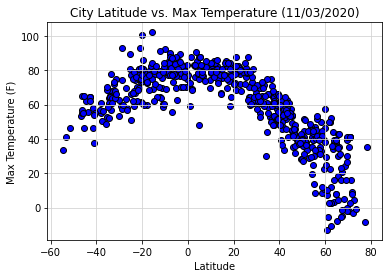

In [21]:
plt.scatter(city_data_weather_info["latitude_deg"],city_data_weather_info["temp_max_F"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Max Temperature (11/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Plots/Lat_MaxTemp.png")
plt.show()

## Latitude vs. Humidity Plot

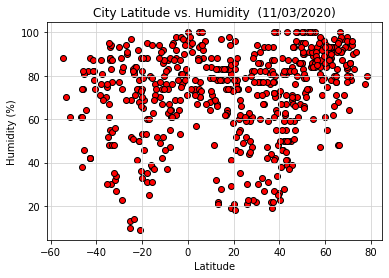

In [22]:
plt.scatter(city_data_weather_info["latitude_deg"],city_data_weather_info["humidity_%"],edgecolors="black",facecolors="red")
plt.title("City Latitude vs. Humidity  (11/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Plots/Lat_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

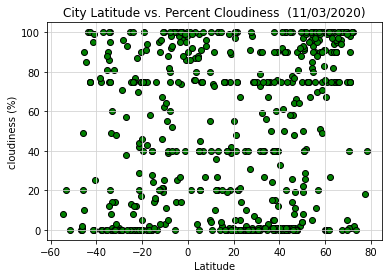

In [23]:
plt.scatter(city_data_weather_info["latitude_deg"],city_data_weather_info["cloudiness_%"],edgecolors="black",facecolors="green")
plt.title("City Latitude vs. Percent Cloudiness  (11/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Plots/Lat_Cloundiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

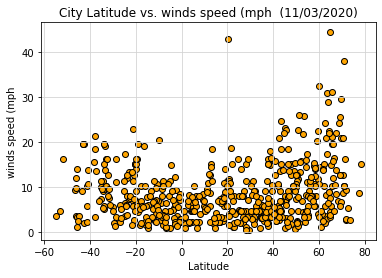

In [24]:
plt.scatter(city_data_weather_info["latitude_deg"],city_data_weather_info["winds speed_mph"],edgecolors="black",facecolors="orange")
plt.title("City Latitude vs. winds speed (mph  (11/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("winds speed (mph")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Plots/Lat_WindSpeed.png")
plt.show()

## Linear Regression

In [25]:
#create northen hemisphere data frame
northern_only = city_data_weather_info.loc[city_data_weather_info["latitude_deg"] > 0,:]
northern_only.head()


,city name,country,city id,latitude_deg,longitude_deg,temp_max_F,humidity_%,cloudiness_%,winds speed_mph
2,Vakhrushev,RU,2119964,48.98,142.97,38.07,67,2,13.58
5,Makat,KZ,608872,47.65,53.35,39.99,70,0,12.53
6,Kyren,RU,2021031,51.68,102.14,34.65,73,41,13.20
7,Faya,SA,110690,18.39,42.45,59.00,87,20,5.82
8,Kudahuvadhoo,MV,1337607,2.67,72.89,82.89,73,76,5.95


In [26]:
#create southern hemisphere dataframe
southern_only = city_data_weather_info.loc[city_data_weather_info["latitude_deg"] <= 0,:]
southern_only.head()

,city name,country,city id,latitude_deg,longitude_deg,temp_max_F,humidity_%,cloudiness_%,winds speed_mph
0,Faanui,PF,4034551,-16.48,-151.75,80.02,80,58,19.06
1,Rikitea,PF,4030556,-23.12,-134.97,74.44,71,0,13.40
3,Port Elizabeth,ZA,964420,-33.92,25.57,64.40,93,20,19.46
4,Malang,ID,1636722,-7.98,112.63,89.62,47,80,1.57
15,Ushuaia,AR,3833367,-54.80,-68.30,33.49,88,8,3.58


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 0, 'Latitude')

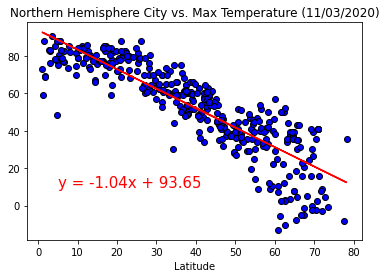

In [27]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_only["latitude_deg"], northern_only["temp_max_F"])
regress_values = northern_only["latitude_deg"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_only["latitude_deg"],northern_only["temp_max_F"],edgecolors="black",facecolors="blue")

plt.plot(northern_only["latitude_deg"],regress_values,"r-")

plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.title("Northern Hemisphere City vs. Max Temperature (11/03/2020)")
plt.xlabel("Latitude") 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.45729329118966106


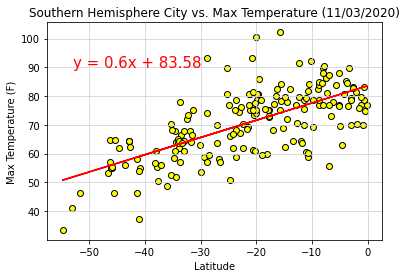

In [28]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_only["latitude_deg"], southern_only["temp_max_F"])
regress_values = southern_only["latitude_deg"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_only["latitude_deg"],southern_only["temp_max_F"],edgecolors="black",facecolors="yellow")

plt.plot(southern_only["latitude_deg"],regress_values,"r-")
plt.annotate(line_eq,(-53,90),fontsize=15,color="red")

plt.title("Southern Hemisphere City vs. Max Temperature (11/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Plots/SLat_MaxTemp_Regres.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06634854416302628


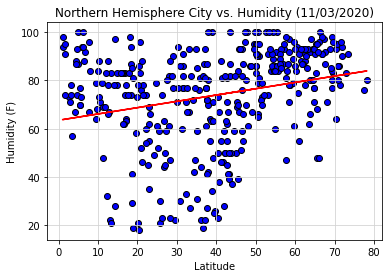

In [29]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_only["latitude_deg"], northern_only["humidity_%"])
regress_values = northern_only["latitude_deg"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_only["latitude_deg"],northern_only["humidity_%"],edgecolors="black",facecolors="blue")

plt.plot(northern_only["latitude_deg"],regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

plt.title("Northern Hemisphere City vs. Humidity (11/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Plots/NLat_Humid_Regres.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.023847065500221424


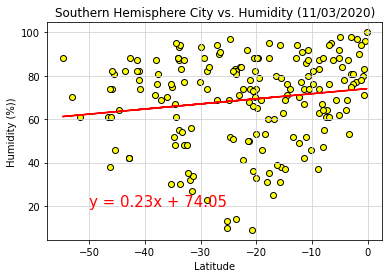

In [30]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_only["latitude_deg"], southern_only["humidity_%"])
regress_values = southern_only["latitude_deg"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_only["latitude_deg"],southern_only["humidity_%"],edgecolors="black",facecolors="yellow")

plt.plot(southern_only["latitude_deg"],regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

plt.title("Southern Hemisphere City vs. Humidity (11/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Plots/SLat_Humid_Regres.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06843494508470101


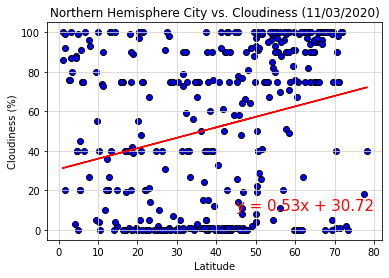

In [31]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_only["latitude_deg"], northern_only["cloudiness_%"])
regress_values = northern_only["latitude_deg"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_only["latitude_deg"],northern_only["cloudiness_%"],edgecolors="black",facecolors="blue")

plt.plot(northern_only["latitude_deg"],regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

plt.title("Northern Hemisphere City vs. Cloudiness (11/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Plots/NLat_Cloud_Regres.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06104258558729154


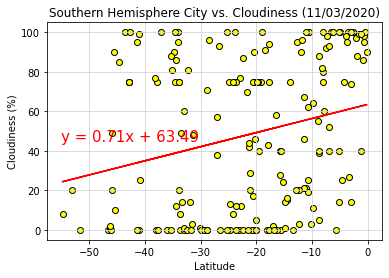

In [32]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_only["latitude_deg"], southern_only["cloudiness_%"])
regress_values = southern_only["latitude_deg"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_only["latitude_deg"],southern_only["cloudiness_%"],edgecolors="black",facecolors="yellow")

plt.plot(southern_only["latitude_deg"],regress_values,"r-")
plt.annotate(line_eq,(-55,45),fontsize=15,color="red")

plt.title("Southern Hemisphere City vs. Cloudiness (11/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Plots/SLat_Cloud_Regres.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.12128510233702997


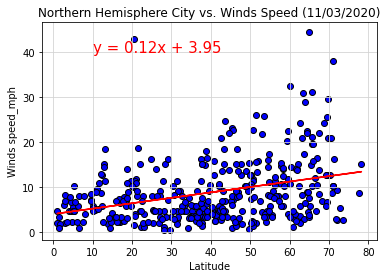

In [33]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_only["latitude_deg"], northern_only["winds speed_mph"])
regress_values = northern_only["latitude_deg"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_only["latitude_deg"],northern_only["winds speed_mph"],edgecolors="black",facecolors="blue")

plt.plot(northern_only["latitude_deg"],regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")

plt.title("Northern Hemisphere City vs. Winds Speed (11/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Winds speed_mph")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Plots/NLat_Wind_Regres.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09143614976508828


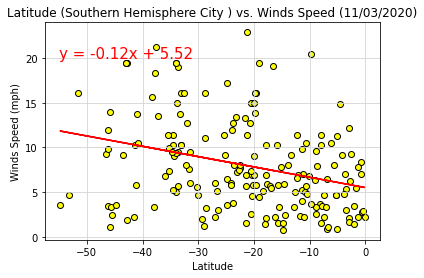

In [34]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_only["latitude_deg"], southern_only["winds speed_mph"])
regress_values = southern_only["latitude_deg"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_only["latitude_deg"],southern_only["winds speed_mph"],edgecolors="black",facecolors="yellow")

plt.plot(southern_only["latitude_deg"],regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

plt.title("Latitude (Southern Hemisphere City ) vs. Winds Speed (11/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Winds Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Plots/SLat_Wind_Regres.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()